In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
pwd

'/Users/guest1/Desktop/covid-19_dataset_Turkey'

In [3]:
df = pd.read_csv("dataset/covid_19_data_tr.csv")
df_confirmed = pd.read_csv("dataset/time_series_covid_19_confirmed_tr.csv")
df_deaths = pd.read_csv("dataset/time_series_covid_19_deaths_tr.csv")
df_recovered = pd.read_csv("dataset/time_series_covid_19_recovered_tr.csv")
df_test_numbers = pd.read_csv("dataset/test_numbers.csv")
df_intubated = pd.read_csv("dataset/time_series_covid_19_intubated_tr.csv")
df_intensive_care = pd.read_csv("dataset/time_series_covid_19_intubated_tr.csv")

In [4]:
df.tail()

,Province/State,Country/Region,Confirmed,Deaths,Recovered,Last_Update
47,NaN,Turkey,112261,2900,33791,4/27/2020
48,NaN,Turkey,114653,2992,38809,4/28/2020
49,NaN,Turkey,117589,3018,44022,4/29/2020
50,NaN,Turkey,120204,3174,48886,4/30/2020
51,NaN,Turkey,122392,3258,53808,5/1/2020


In [5]:
df.head()

,Province/State,Country/Region,Confirmed,Deaths,Recovered,Last_Update
0,NaN,Turkey,1,0,0,3/11/2020
1,NaN,Turkey,1,0,0,3/12/2020
2,NaN,Turkey,5,0,0,3/13/2020
3,NaN,Turkey,5,0,0,3/14/2020
4,NaN,Turkey,18,0,0,3/15/2020


In [6]:
df.drop("Province/State", axis = 1, inplace = True)
df.tail()

,Country/Region,Confirmed,Deaths,Recovered,Last_Update
47,Turkey,112261,2900,33791,4/27/2020
48,Turkey,114653,2992,38809,4/28/2020
49,Turkey,117589,3018,44022,4/29/2020
50,Turkey,120204,3174,48886,4/30/2020
51,Turkey,122392,3258,53808,5/1/2020


In [7]:
df_testnum = df_test_numbers.iloc[:, 4:].values[0]
df_intub = df_intubated.iloc[:, 4:].values[0]
df_intcare = df_intensive_care.iloc[:, 4:].values[0]

In [8]:
df['Testnum']=df_testnum
df['Intub']=df_intub
df['Intcare']=df_intcare

In [9]:
df.tail()
                               

,Country/Region,Confirmed,Deaths,Recovered,Last_Update,Testnum,Intub,Intcare
47,Turkey,112261,2900,33791,4/27/2020,20143,882,882
48,Turkey,114653,2992,38809,4/28/2020,29230,845,845
49,Turkey,117589,3018,44022,4/29/2020,43498,831,831
50,Turkey,120204,3174,48886,4/30/2020,42004,803,803
51,Turkey,122392,3258,53808,5/1/2020,41431,818,818


In [10]:
df= df.set_index('Last_Update')
df

,Country/Region,Confirmed,Deaths,Recovered,Testnum,Intub,Intcare
Last_Update,,,,,,,
3/11/2020,Turkey,1,0,0,0,0,0
3/12/2020,Turkey,1,0,0,0,0,0
3/13/2020,Turkey,5,0,0,3060,0,0
3/14/2020,Turkey,5,0,0,0,0,0
3/15/2020,Turkey,18,0,0,0,0,0
3/16/2020,Turkey,47,0,0,0,0,0
3/17/2020,Turkey,98,1,0,4002,0,0
3/18/2020,Turkey,191,2,0,2015,0,0
3/19/2020,Turkey,359,4,0,1981,0,0


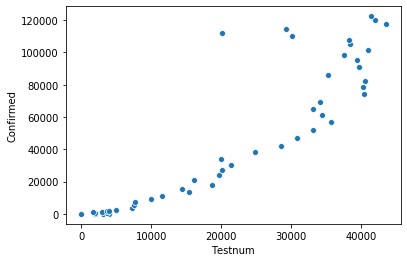

In [12]:
sns.scatterplot(x='Testnum', y='Confirmed', data=df);

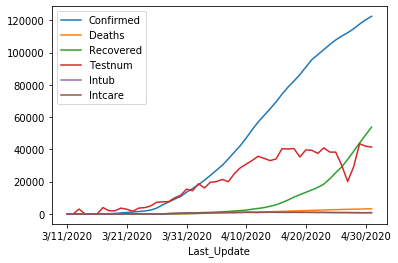

In [14]:
df.plot();